**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Proyecto Integrador

---

*   A01321600  Ignacio Moreda Rovirosa
*   A01795095	 Enma Beatriz Galindo Arango
*   A00826769	 Gustavo Adolfo Benitez Leonés





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
DIR = "/content/drive/MyDrive/Equipo 39_Proyecto integrador"
os.chdir(DIR)

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Equipo 39_Proyecto integrador/dataset_inicial_globulive.xlsx - dataset.csv")
df

,Producto_Code,Producto_Name,API,Canal_Code,Canal_Descripcion,Ubicacion_Code,Ubicacion_Name,Ubicacion_Tipo,Capacidad_Canal,Trafico_ref_diario,Mes,Mes_Num,Precio_Q,Demanda_Proyectada_Semana,Inventario_Inicial_Lote,Fecha_Fabricacion,Fecha_Vencimiento
0,MDMI,Men’s Defense & Muscle/Immune,"Mg, Zn, VitD3, Se, L. plantarum",VM,Vending machine,CC01,Oakland Mall (Zona 10),Centro comercial,400,20000,Enero,1,150,314.9,7000,2025-01-01,2027-01-01
1,MDMI,Men’s Defense & Muscle/Immune,"Mg, Zn, VitD3, Se, L. plantarum",VM,Vending machine,CC01,Oakland Mall (Zona 10),Centro comercial,400,20000,Febrero,2,150,295.9,7000,2025-01-01,2027-01-01
2,MDMI,Men’s Defense & Muscle/Immune,"Mg, Zn, VitD3, Se, L. plantarum",VM,Vending machine,CC01,Oakland Mall (Zona 10),Centro comercial,400,20000,Marzo,3,150,319.4,7000,2025-01-01,2027-01-01
3,MDMI,Men’s Defense & Muscle/Immune,"Mg, Zn, VitD3, Se, L. plantarum",VM,Vending machine,CC01,Oakland Mall (Zona 10),Centro comercial,400,20000,Abril,4,150,380.3,7000,2025-01-01,2027-01-01
4,MDMI,Men’s Defense & Muscle/Immune,"Mg, Zn, VitD3, Se, L. plantarum",VM,Vending machine,CC01,Oakland Mall (Zona 10),Centro comercial,400,20000,Mayo,5,150,293.0,7000,2025-01-01,2027-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,BRFO,Brain Focus,"Omega-3, Melena de león, Vit B6, Vit B12, L. r...",CD,Counter display box,SAL1,Salón TalkinHeads,Salón de belleza,30,90,Agosto,8,150,10.9,7000,2025-01-01,2027-01-01
656,BRFO,Brain Focus,"Omega-3, Melena de león, Vit B6, Vit B12, L. r...",CD,Counter display box,SAL1,Salón TalkinHeads,Salón de belleza,30,90,Septiembre,9,150,10.8,7000,2025-01-01,2027-01-01
657,BRFO,Brain Focus,"Omega-3, Melena de león, Vit B6, Vit B12, L. r...",CD,Counter display box,SAL1,Salón TalkinHeads,Salón de belleza,30,90,Octubre,10,150,10.8,7000,2025-01-01,2027-01-01
658,BRFO,Brain Focus,"Omega-3, Melena de león, Vit B6, Vit B12, L. r...",CD,Counter display box,SAL1,Salón TalkinHeads,Salón de belleza,30,90,Noviembre,11,150,11.0,7000,2025-01-01,2027-01-01


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.shape

(660, 17)

# **Parte 1**. Análisis descriptivo (univariante)

1. Resumen de los tipos de datos.
Columnas numéricas y cualitativas

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Producto_Code              660 non-null    object 
 1   Producto_Name              660 non-null    object 
 2   API                        660 non-null    object 
 3   Canal_Code                 660 non-null    object 
 4   Canal_Descripcion          660 non-null    object 
 5   Ubicacion_Code             660 non-null    object 
 6   Ubicacion_Name             660 non-null    object 
 7   Ubicacion_Tipo             660 non-null    object 
 8   Capacidad_Canal            660 non-null    int64  
 9   Trafico_ref_diario         660 non-null    int64  
 10  Mes                        660 non-null    object 
 11  Mes_Num                    660 non-null    int64  
 12  Precio_Q                   660 non-null    int64  
 13  Demanda_Proyectada_Semana  660 non-null    float64

In [33]:
# Codificar categorías a numérico (útil para correlaciones y modelos base)
map_producto = {'MDMI':1, 'BSLP':2, 'BANT':3, 'DIGM':4, 'BRFO':5}
map_canal    = {'VM':1, 'CD':0}
map_ubi      = {'Centro comercial':1, 'Universidad':2, 'Gimnasio':3, 'Salón de belleza':4}

df['Producto_Code_num']  = df['Producto_Code'].map(map_producto)
df['Canal_Code_num']     = df['Canal_Code'].map(map_canal)
df['Ubicacion_Tipo_num'] = df['Ubicacion_Tipo'].map(map_ubi)

# Estacionalidad simple (alta = 1, baja = 0) según reglas del proyecto
alta_uni = {'Enero','Febrero','Marzo','Abril','Mayo','Agosto','Septiembre','Octubre','Noviembre'}
df['Estacionalidad_Universidad'] = df.apply(
    lambda r: int(r['Ubicacion_Tipo']=='Universidad' and r['Mes'] in alta_uni), axis=1
)

alta_cc = {'Diciembre','Abril','Julio'}
df['Estacionalidad_CC'] = df.apply(
    lambda r: int(r['Ubicacion_Tipo']=='Centro comercial' and r['Mes'] in alta_cc), axis=1
)

alta_gym = {'Enero','Febrero','Septiembre'}
df['Estacionalidad_Gym'] = df.apply(
    lambda r: int(r['Ubicacion_Tipo']=='Gimnasio' and r['Mes'] in alta_gym), axis=1
)


 2. Determina el porcentaje de valores faltantes por columna.

In [34]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Producto_Code,0
Producto_Name,0
API,0
Canal_Code,0
Canal_Descripcion,0
Ubicacion_Code,0
Ubicacion_Name,0
Ubicacion_Tipo,0
Capacidad_Canal,0
Trafico_ref_diario,0


In [10]:
percentage_missing = (total / len(df)) * 100
percentage_missing

,0
Producto_Code,0.0
Producto_Name,0.0
API,0.0
Canal_Code,0.0
Canal_Descripcion,0.0
Ubicacion_Code,0.0
Ubicacion_Name,0.0
Ubicacion_Tipo,0.0
Capacidad_Canal,0.0
Trafico_ref_diario,0.0


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [12]:
numeric_columns = [
    'Trafico_ref_diario',
    'Capacidad_Canal',
    'Precio_Q',
    'Demanda_Proyectada_Semana'
]
data_subset = df[numeric_columns]
data_subset.describe()


,Trafico_ref_diario,Capacidad_Canal,Precio_Q,Demanda_Proyectada_Semana
count,660.000000,660.000000,660.0,660.000000
mean,6512.727273,265.454545,150.0,109.793939
std,6781.158523,178.121898,0.0,106.614531
min,90.000000,30.000000,150.0,5.900000
25%,350.000000,30.000000,150.0,26.450000
50%,3500.000000,400.000000,150.0,56.600000
75%,15000.000000,400.000000,150.0,204.125000
max,20000.000000,400.000000,150.0,400.000000


Asimetría

In [14]:
skew_global = df.skew(numeric_only=True)
print(skew_global.sort_values(ascending=False))

Demanda_Proyectada_Semana    1.030500
Trafico_ref_diario           0.773589
Precio_Q                     0.000000
Mes_Num                      0.000000
Inventario_Inicial_Lote      0.000000
Capacidad_Canal             -0.568239
dtype: float64


In [15]:
cols_num = ['Trafico_ref_diario','Capacidad_Canal','Precio_Q','Demanda_Proyectada_Semana']
skew_subset = df[cols_num].skew()
print(skew_subset.sort_values(ascending=False))

Demanda_Proyectada_Semana    1.030500
Trafico_ref_diario           0.773589
Precio_Q                     0.000000
Capacidad_Canal             -0.568239
dtype: float64


In [16]:
skew_por_tipo = (
    df.groupby('Ubicacion_Tipo')[cols_num]
      .apply(lambda g: g.skew())
)
print(skew_por_tipo)

                  Trafico_ref_diario  Capacidad_Canal  Precio_Q  \
Ubicacion_Tipo                                                    
Centro comercial            0.151710              0.0       0.0   
Gimnasio                    0.000000              0.0       0.0   
Salón de belleza            0.000000              0.0       0.0   
Universidad                 0.202391              0.0       0.0   

                  Demanda_Proyectada_Semana  
Ubicacion_Tipo                               
Centro comercial                   0.294062  
Gimnasio                          -0.544303  
Salón de belleza                   0.471585  
Universidad                        0.866797  


Curtosis

In [18]:
cols_num = ['Trafico_ref_diario','Capacidad_Canal','Precio_Q','Demanda_Proyectada_Semana']
kurtosis_vals = df[cols_num].kurtosis()
print(kurtosis_vals)

Trafico_ref_diario          -0.852543
Capacidad_Canal             -1.682211
Precio_Q                     0.000000
Demanda_Proyectada_Semana   -0.223032
dtype: float64


In [19]:
kurtosis_por_tipo = (
    df.groupby('Ubicacion_Tipo')[cols_num]
      .apply(lambda g: g.kurtosis())
)
print(kurtosis_por_tipo)

                  Trafico_ref_diario  Capacidad_Canal  Precio_Q  \
Ubicacion_Tipo                                                    
Centro comercial           -1.687286              0.0       0.0   
Gimnasio                   -1.508427              0.0       0.0   
Salón de belleza            0.000000              0.0       0.0   
Universidad                -1.508427              0.0       0.0   

                  Demanda_Proyectada_Semana  
Ubicacion_Tipo                               
Centro comercial                  -1.393633  
Gimnasio                          -0.954125  
Salón de belleza                  -1.163066  
Universidad                       -0.023756  


In [20]:
# --- Variables a evaluar en nuestro dataset ---
var1 = 'Demanda_Proyectada_Semana'  # target
var2 = 'Trafico_ref_diario'         # driver principal

# --- Cálculo de asimetría y curtosis (global) ---
skew_v1 = df[var1].skew()
kurt_v1 = df[var1].kurtosis()

skew_v2 = df[var2].skew()
kurt_v2 = df[var2].kurtosis()


def clasif_skew(x):
    if x < 0:  return "Negativa (sesgo a la izquierda)"
    if x > 0:  return "Positiva (sesgo a la derecha)"
    return "Cercana a 0 (aprox. simétrica)"

def clasif_kurt(x):
    if x < 0:  return "Platicúrtica (colas ligeras)"
    if x > 0:  return "Leptocúrtica (colas pesadas)"
    return "Mesocúrtica (similar normal)"

print(f"Para {var1}:")
print(f"Asimetría: {skew_v1:.4f}, Clasificación: {clasif_skew(skew_v1)}")
print(f"Curtosis:  {kurt_v1:.4f}, Clasificación: {clasif_kurt(kurt_v1)}")

print(f"\nPara {var2}:")
print(f"Asimetría: {skew_v2:.4f}, Clasificación: {clasif_skew(skew_v2)}")
print(f"Curtosis:  {kurt_v2:.4f}, Clasificación: {clasif_kurt(kurt_v2)}")


Para Demanda_Proyectada_Semana:
Asimetría: 1.0305, Clasificación: Positiva (sesgo a la derecha)
Curtosis:  -0.2230, Clasificación: Platicúrtica (colas ligeras)

Para Trafico_ref_diario:
Asimetría: 0.7736, Clasificación: Positiva (sesgo a la derecha)
Curtosis:  -0.8525, Clasificación: Platicúrtica (colas ligeras)


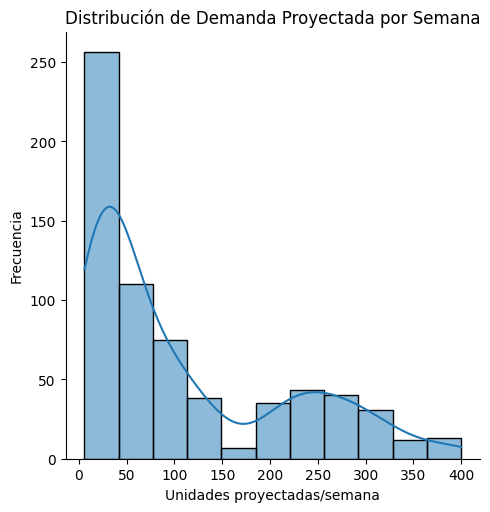

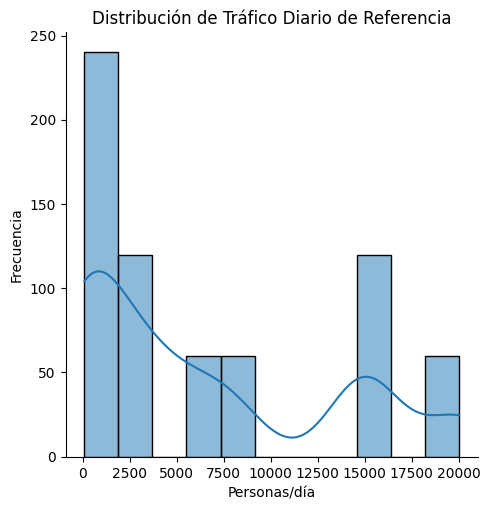

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la demanda proyectada por semana
sns.displot(df['Demanda_Proyectada_Semana'].dropna(), kde=True)
plt.title("Distribución de Demanda Proyectada por Semana")
plt.xlabel("Unidades proyectadas/semana")
plt.ylabel("Frecuencia")
plt.show()

# Distribución del tráfico diario de referencia
sns.displot(df['Trafico_ref_diario'].dropna(), kde=True)
plt.title("Distribución de Tráfico Diario de Referencia")
plt.xlabel("Personas/día")
plt.ylabel("Frecuencia")
plt.show()


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

<Figure size 1500x1000 with 0 Axes>

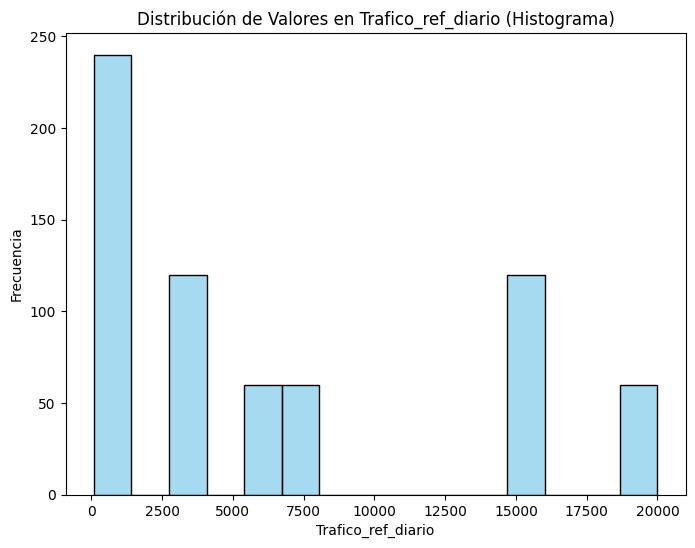

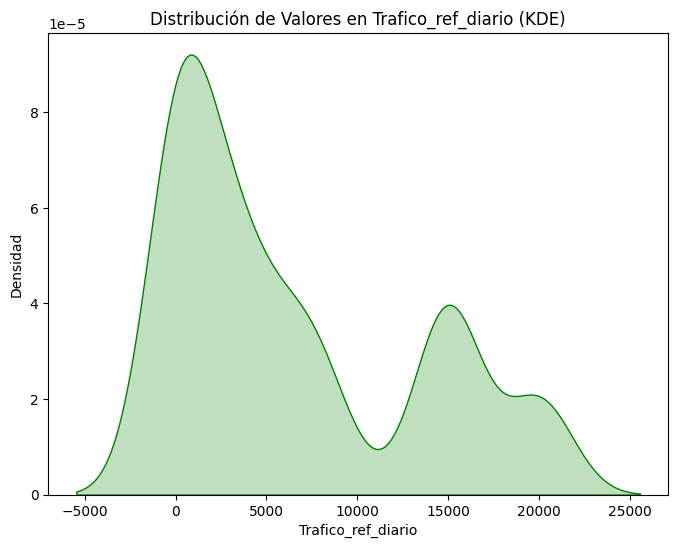

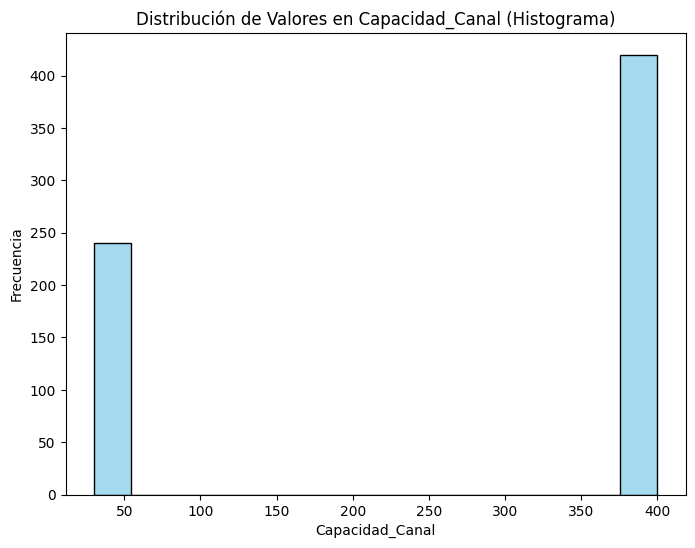

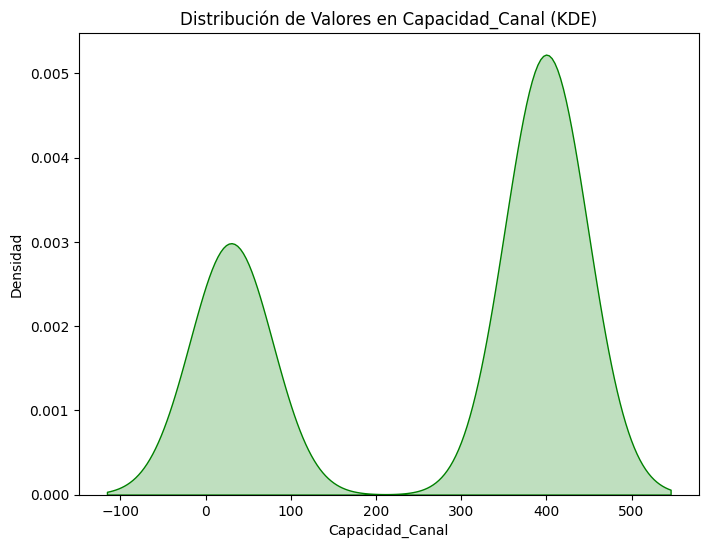

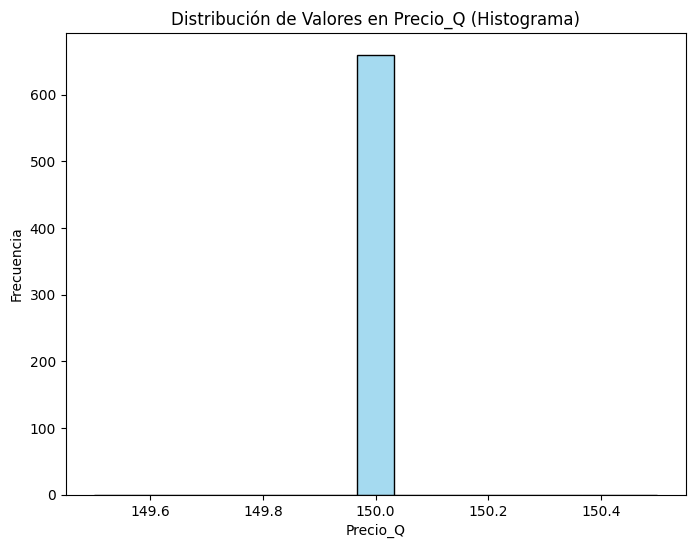

/tmp/ipython-input-49218572.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], color="green", fill=True)


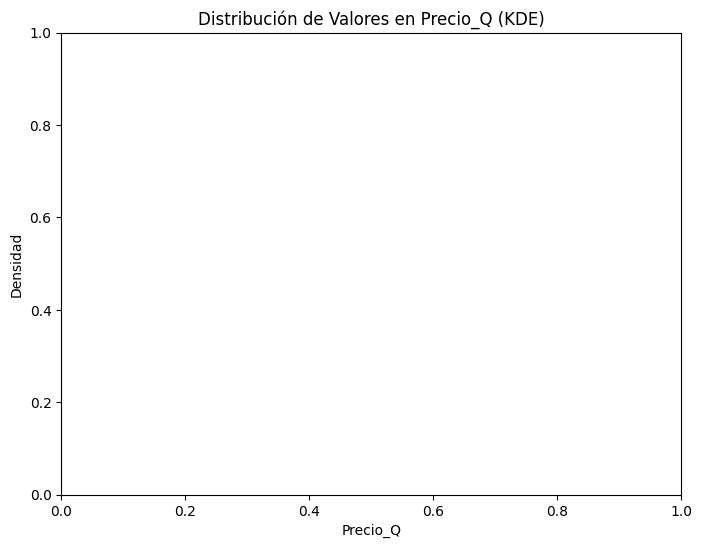

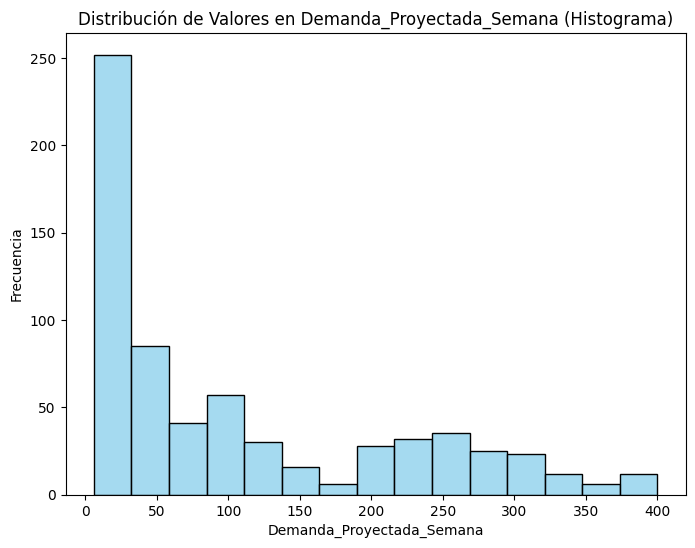

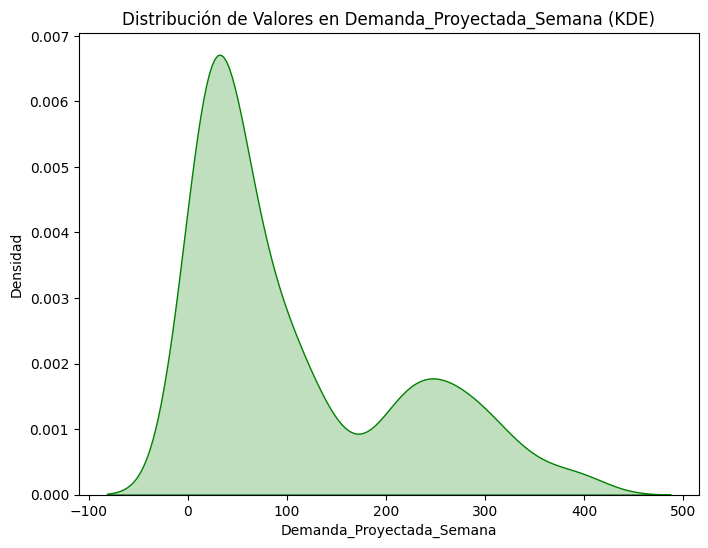

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables cuantitativas del dataset de Globulive
quantitative_columns = [
    'Trafico_ref_diario',
    'Capacidad_Canal',
    'Precio_Q',
    'Demanda_Proyectada_Semana'
]

plt.figure(figsize=(15, 10))

for column in quantitative_columns:
    # Histograma
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=False, color="skyblue", bins=15)
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de Valores en {column} (Histograma)")
    plt.show()

    # KDE (curva suavizada)
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[column], color="green", fill=True)
    plt.xlabel(column)
    plt.ylabel("Densidad")
    plt.title(f"Distribución de Valores en {column} (KDE)")
    plt.show()

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

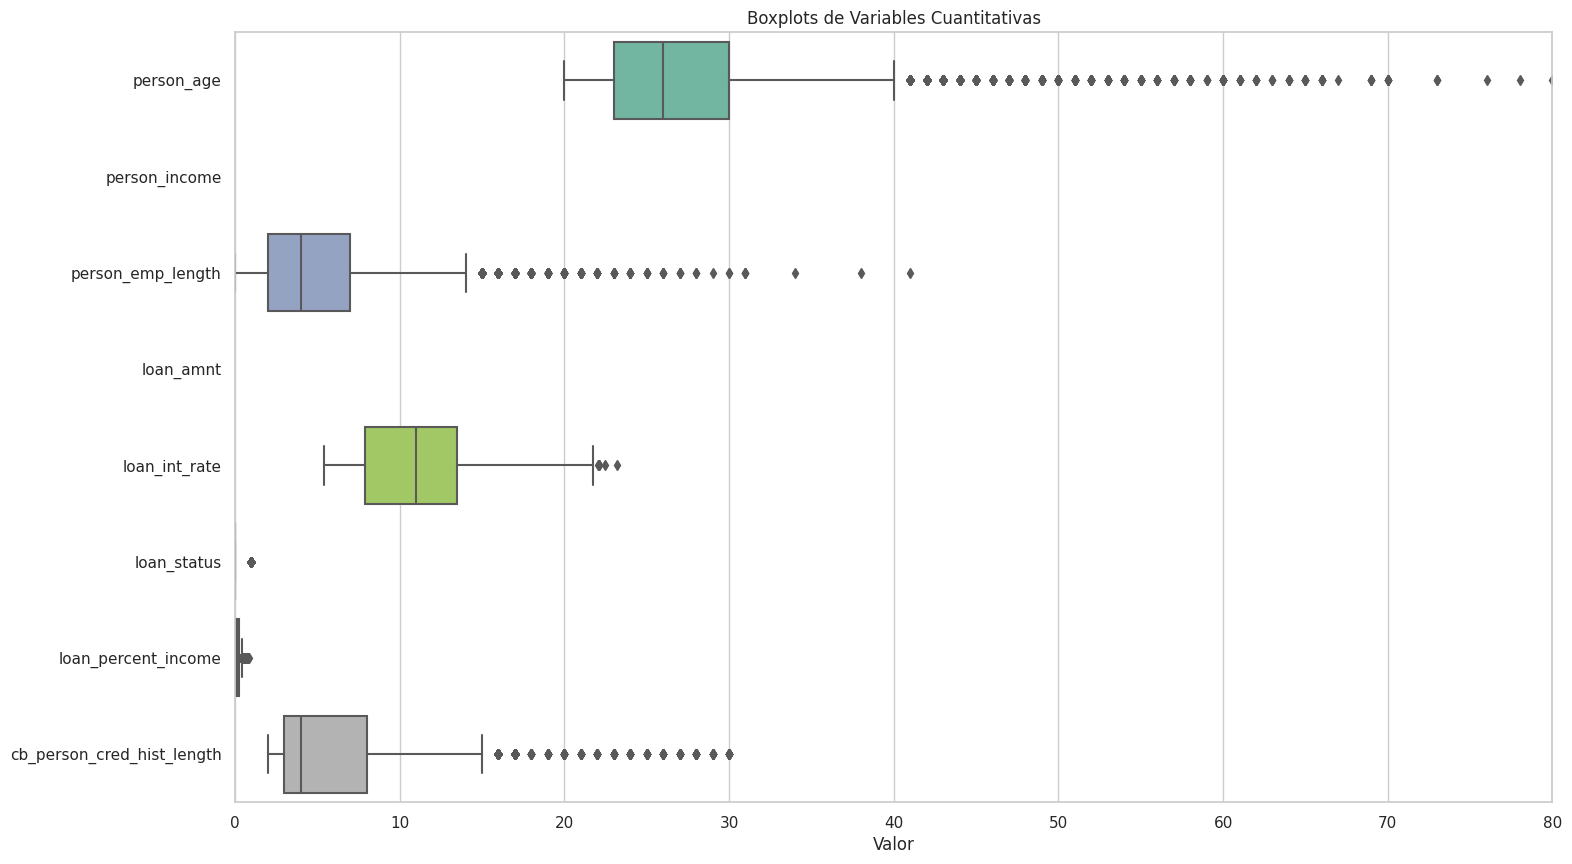

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

quantitative_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
plt.figure(figsize=(17, 10))

sns.set(style="whitegrid")
sns.boxplot(data=df[quantitative_columns], orient="h", palette="Set2")

plt.title("Boxplots de Variables Cuantitativas")
plt.xlabel("Valor")
plt.xlim(0, 80)

plt.show()

In [23]:
# Lista de variables numéricas relevantes
numeric_cols = ['Trafico_ref_diario','Capacidad_Canal','Precio_Q','Demanda_Proyectada_Semana']

outliers_dict = {}

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    # Filtrar outliers
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    outliers_dict[col] = {
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
        "lower_limit": lower_limit,
        "upper_limit": upper_limit,
        "num_outliers": len(outliers),
        "outliers_examples": outliers[[col]].head(5)  # muestra ejemplos
    }

# Imprimir resumen
for col, info in outliers_dict.items():
    print(f"\n--- {col} ---")
    print(f"IQR: {info['iqr']:.2f}, Límite inferior: {info['lower_limit']:.2f}, Límite superior: {info['upper_limit']:.2f}")
    print(f"Número de outliers detectados: {info['num_outliers']}")
    print(info["outliers_examples"])



--- Trafico_ref_diario ---
IQR: 14650.00, Límite inferior: -21625.00, Límite superior: 36975.00
Número de outliers detectados: 0
Empty DataFrame
Columns: [Trafico_ref_diario]
Index: []

--- Capacidad_Canal ---
IQR: 370.00, Límite inferior: -525.00, Límite superior: 955.00
Número de outliers detectados: 0
Empty DataFrame
Columns: [Capacidad_Canal]
Index: []

--- Precio_Q ---
IQR: 0.00, Límite inferior: 150.00, Límite superior: 150.00
Número de outliers detectados: 0
Empty DataFrame
Columns: [Precio_Q]
Index: []

--- Demanda_Proyectada_Semana ---
IQR: 177.68, Límite inferior: -240.06, Límite superior: 470.64
Número de outliers detectados: 0
Empty DataFrame
Columns: [Demanda_Proyectada_Semana]
Index: []


# Análisis de variables categóricas

In [24]:
qualitative_columns = ['Producto_Code', 'Canal_Code', 'Ubicacion_Tipo', 'Mes']
descriptivas = df[qualitative_columns].describe()
print(descriptivas)


       Producto_Code Canal_Code    Ubicacion_Tipo    Mes
count            660        660               660    660
unique             5          2                 4     12
top             MDMI         VM  Centro comercial  Enero
freq             132        420               240     55


In [25]:
qualitative_columns = ['Producto_Code', 'Canal_Code', 'Ubicacion_Tipo', 'Mes']
for column in qualitative_columns:
    unique_counts = df[column].value_counts()
    print(f"Recuentos únicos para la columna '{column}':")
    print(unique_counts)
    print("\n")


Recuentos únicos para la columna 'Producto_Code':
Producto_Code
MDMI    132
BSLP    132
BANT    132
DIGM    132
BRFO    132
Name: count, dtype: int64


Recuentos únicos para la columna 'Canal_Code':
Canal_Code
VM    420
CD    240
Name: count, dtype: int64


Recuentos únicos para la columna 'Ubicacion_Tipo':
Ubicacion_Tipo
Centro comercial    240
Universidad         180
Gimnasio            180
Salón de belleza     60
Name: count, dtype: int64


Recuentos únicos para la columna 'Mes':
Mes
Enero         55
Febrero       55
Marzo         55
Abril         55
Mayo          55
Junio         55
Julio         55
Agosto        55
Septiembre    55
Octubre       55
Noviembre     55
Diciembre     55
Name: count, dtype: int64




7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

/tmp/ipython-input-2506188418.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Blues")


<Figure size 1200x800 with 0 Axes>

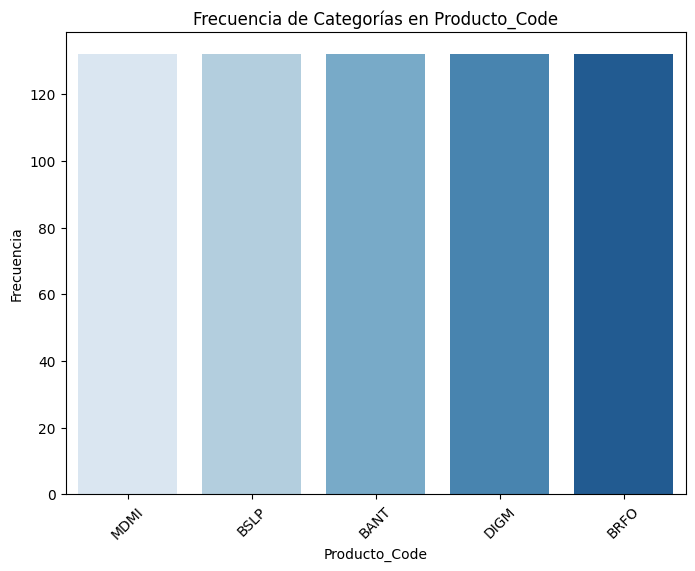

/tmp/ipython-input-2506188418.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Blues")


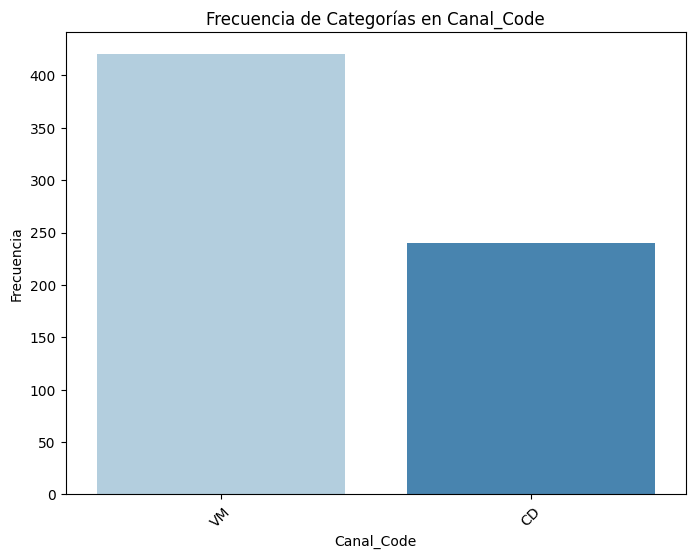

/tmp/ipython-input-2506188418.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Blues")


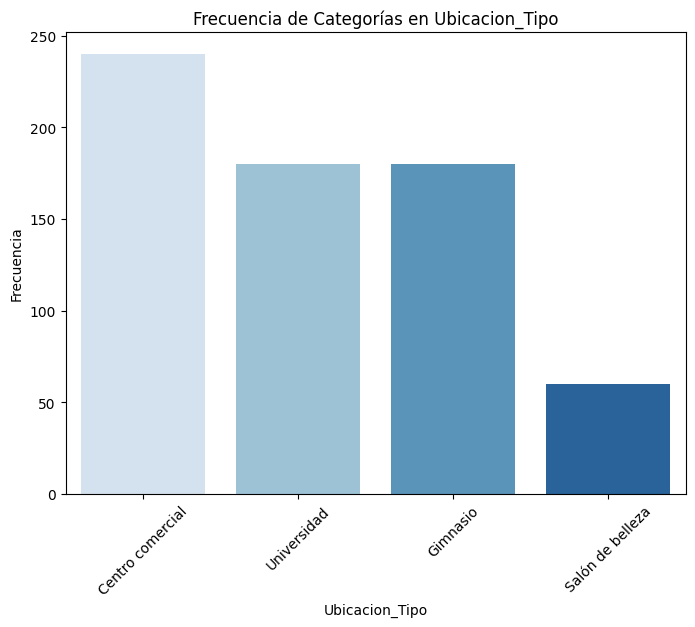

/tmp/ipython-input-2506188418.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Blues")


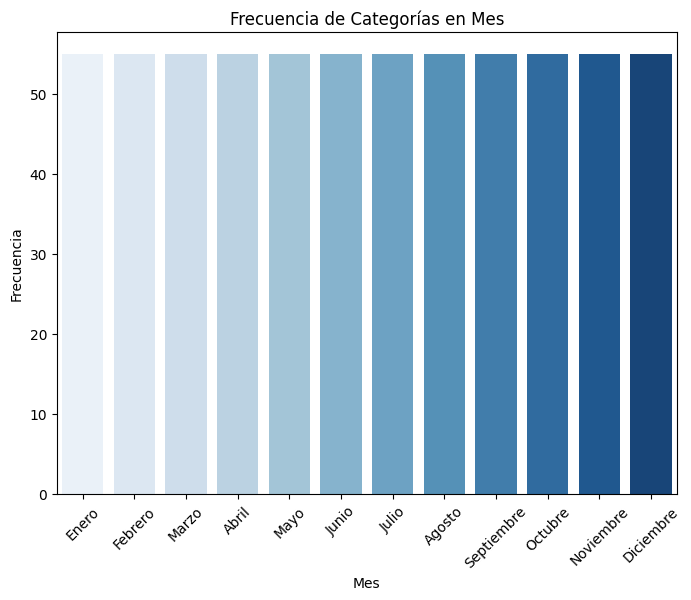

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

qualitative_columns = ['Producto_Code', 'Canal_Code', 'Ubicacion_Tipo', 'Mes']

plt.figure(figsize=(12, 8))

for column in qualitative_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, palette="Blues")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.title(f"Frecuencia de Categorías en {column}")
    plt.xticks(rotation=45)
    plt.show()



# **Parte 2**. Análisis de correlación (bivariante y multivariante)

/tmp/ipython-input-888610255.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-888610255.py:6: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.boxplot(


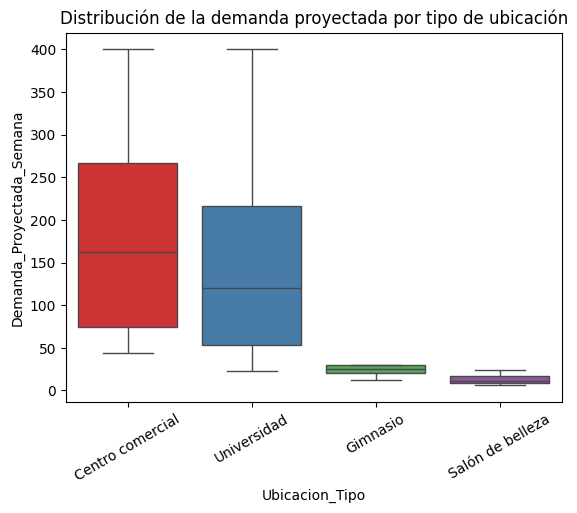

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = sns.color_palette("Set1")

sns.boxplot(
    x='Ubicacion_Tipo',
    y='Demanda_Proyectada_Semana',
    data=df,
    palette=custom_palette
)
plt.title("Distribución de la demanda proyectada por tipo de ubicación")
plt.xticks(rotation=30)
plt.show()


/tmp/ipython-input-1003098823.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1003098823.py:1: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(


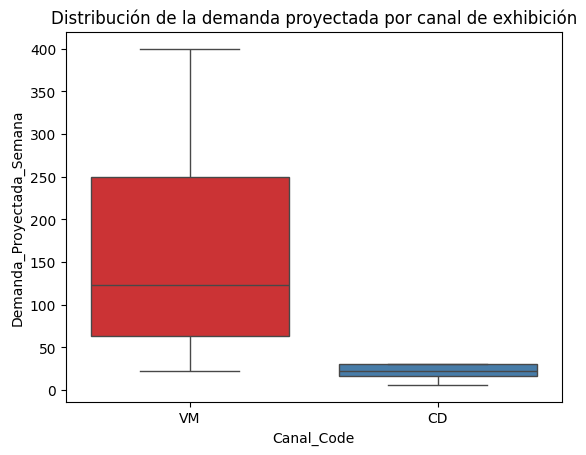

In [28]:
sns.boxplot(
    x='Canal_Code',
    y='Demanda_Proyectada_Semana',
    data=df,
    palette=custom_palette
)
plt.title("Distribución de la demanda proyectada por canal de exhibición")
plt.show()


/tmp/ipython-input-3603563224.py:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(x=column, hue='Canal_Code', data=df, palette=custom_palette)


<Figure size 1200x800 with 0 Axes>

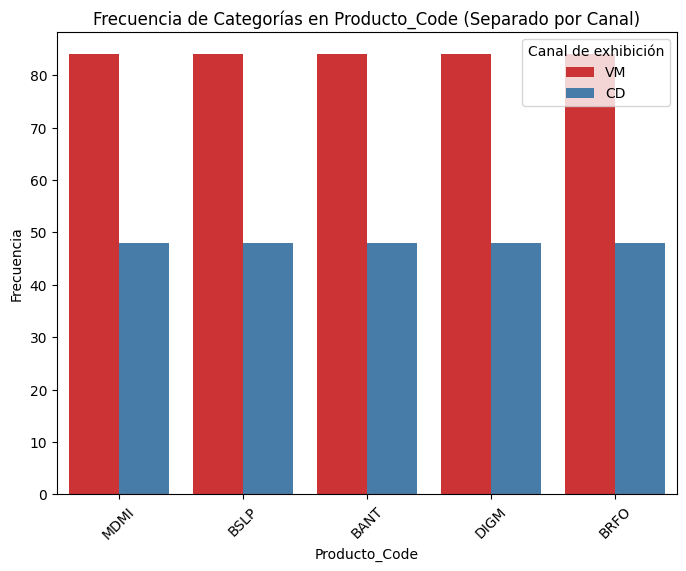

/tmp/ipython-input-3603563224.py:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(x=column, hue='Canal_Code', data=df, palette=custom_palette)


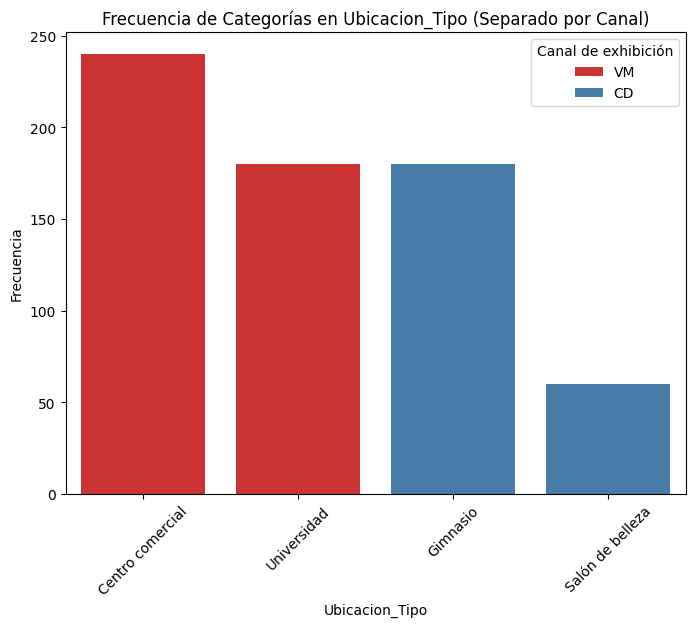

/tmp/ipython-input-3603563224.py:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(x=column, hue='Canal_Code', data=df, palette=custom_palette)


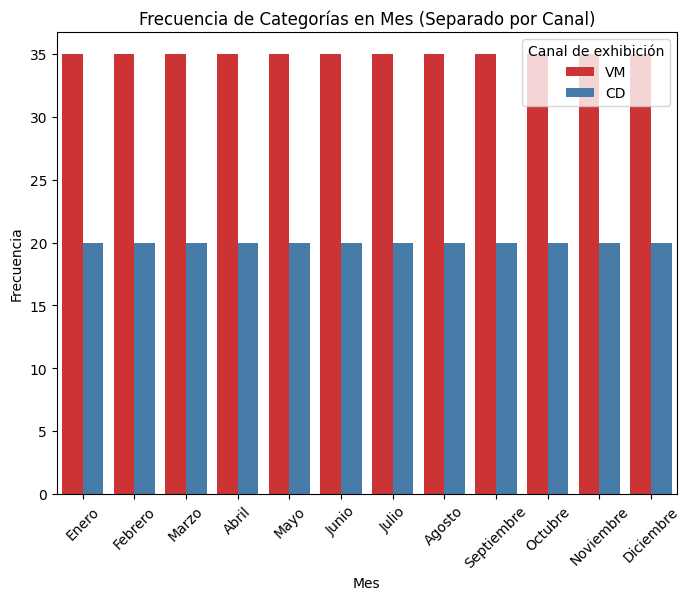

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

qualitative_columns = ['Producto_Code', 'Ubicacion_Tipo', 'Mes']

plt.figure(figsize=(12, 8))
custom_palette = sns.color_palette("Set1")

for column in qualitative_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='Canal_Code', data=df, palette=custom_palette)

    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.title(f"Frecuencia de Categorías en {column} (Separado por Canal)")
    plt.legend(title='Canal de exhibición')

    plt.xticks(rotation=45)
    plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.

In [30]:
numeric_cols = ['Trafico_ref_diario', 'Capacidad_Canal', 'Precio_Q', 'Demanda_Proyectada_Semana']
correlation = df[numeric_cols].corr(method='pearson')
print(correlation)

                           Trafico_ref_diario  Capacidad_Canal  Precio_Q  \
Trafico_ref_diario                   1.000000         0.694762       NaN   
Capacidad_Canal                      0.694762         1.000000       NaN   
Precio_Q                                  NaN              NaN       NaN   
Demanda_Proyectada_Semana            0.947213         0.624997       NaN   

                           Demanda_Proyectada_Semana  
Trafico_ref_diario                          0.947213  
Capacidad_Canal                             0.624997  
Precio_Q                                         NaN  
Demanda_Proyectada_Semana                   1.000000  


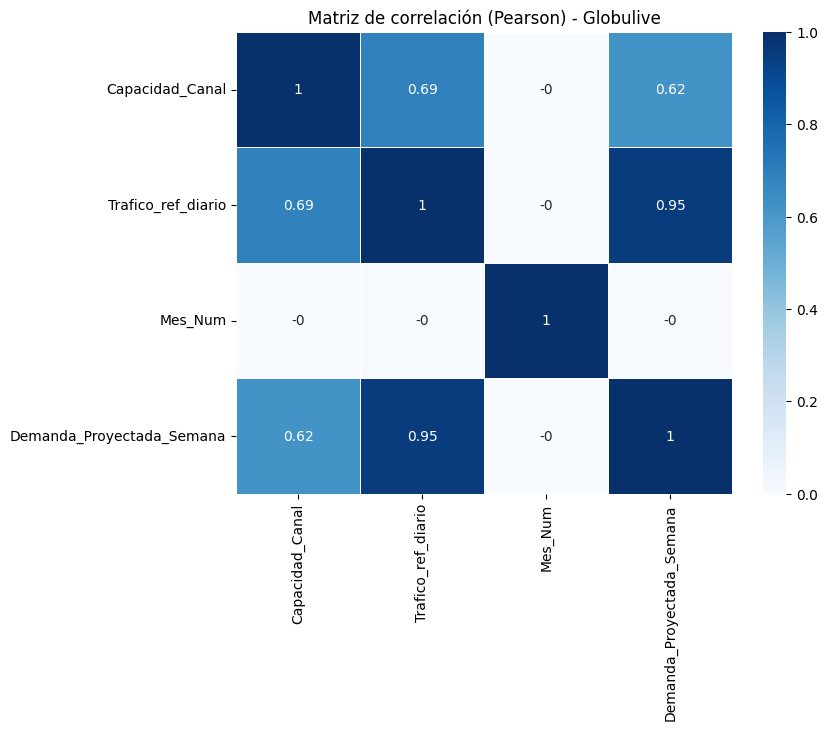

In [32]:
# Detectar columnas con varianza > 0
numeric_cols = df.select_dtypes(include=['int64','float64']).nunique()
valid_cols = numeric_cols[numeric_cols > 1].index

# Calcular correlación solo en esas
correlation = df[valid_cols].corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(round(correlation, 2), annot=True, cmap="Blues", linewidths=0.5)
plt.title("Matriz de correlación (Pearson) - Globulive")
plt.show()


# Estadísticas resumidas

In [36]:
# Numéricas
num_cols = ['Trafico_ref_diario','Capacidad_Canal','Precio_Q','Demanda_Proyectada_Semana','Mes_Num']
df[num_cols].describe().T

# Categóricas
cat_cols = ['Producto_Code','Canal_Code','Ubicacion_Tipo','Mes']
for c in cat_cols:
    print(f"\n{c} | únicos={df[c].nunique()}")
    print(df[c].value_counts(dropna=False))



Producto_Code | únicos=5
Producto_Code
MDMI    132
BSLP    132
BANT    132
DIGM    132
BRFO    132
Name: count, dtype: int64

Canal_Code | únicos=2
Canal_Code
VM    420
CD    240
Name: count, dtype: int64

Ubicacion_Tipo | únicos=4
Ubicacion_Tipo
Centro comercial    240
Universidad         180
Gimnasio            180
Salón de belleza     60
Name: count, dtype: int64

Mes | únicos=12
Mes
Enero         55
Febrero       55
Marzo         55
Abril         55
Mayo          55
Junio         55
Julio         55
Agosto        55
Septiembre    55
Octubre       55
Noviembre     55
Diciembre     55
Name: count, dtype: int64


In [37]:
def iqr_outliers(s: pd.Series):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < lo) | (s > hi)
    return {'q1':q1, 'q3':q3, 'iqr':iqr, 'low':lo, 'high':hi, 'n_outliers':int(mask.sum())}

for col in ['Trafico_ref_diario','Capacidad_Canal','Demanda_Proyectada_Semana']:
    print(col, iqr_outliers(df[col]))

# Por tipo de ubicación
out_by_type = (
    df.groupby('Ubicacion_Tipo')[['Trafico_ref_diario','Capacidad_Canal','Demanda_Proyectada_Semana']]
      .apply(lambda g: pd.Series({
          'out_trafico': iqr_outliers(g['Trafico_ref_diario'])['n_outliers'],
          'out_capacidad': iqr_outliers(g['Capacidad_Canal'])['n_outliers'],
          'out_demanda': iqr_outliers(g['Demanda_Proyectada_Semana'])['n_outliers']
      }))
)
print(out_by_type)

Trafico_ref_diario {'q1': np.float64(350.0), 'q3': np.float64(15000.0), 'iqr': np.float64(14650.0), 'low': np.float64(-21625.0), 'high': np.float64(36975.0), 'n_outliers': 0}
Capacidad_Canal {'q1': np.float64(30.0), 'q3': np.float64(400.0), 'iqr': np.float64(370.0), 'low': np.float64(-525.0), 'high': np.float64(955.0), 'n_outliers': 0}
Demanda_Proyectada_Semana {'q1': np.float64(26.45), 'q3': np.float64(204.125), 'iqr': np.float64(177.675), 'low': np.float64(-240.06250000000006), 'high': np.float64(470.63750000000005), 'n_outliers': 0}
                  out_trafico  out_capacidad  out_demanda
Ubicacion_Tipo                                           
Centro comercial            0              0            0
Gimnasio                    0              0            0
Salón de belleza            0              0            0
Universidad                 0              0            0


In [38]:
card = {c: df[c].nunique() for c in ['Producto_Code','Canal_Code','Ubicacion_Tipo','Ubicacion_Name','Mes']}
card

{'Producto_Code': 5,
 'Canal_Code': 2,
 'Ubicacion_Tipo': 4,
 'Ubicacion_Name': 11,
 'Mes': 12}

In [39]:
# Skew/kurtosis globales
skew = df[num_cols].skew(numeric_only=True)
kurt = df[num_cols].kurtosis(numeric_only=True)
print("Skew:\n", skew, "\n\nKurt:\n", kurt)

# Skew por tipo de ubicación para la variable target
print("\nSkew Demanda por Ubicacion_Tipo:\n",
      df.groupby('Ubicacion_Tipo')['Demanda_Proyectada_Semana'].skew())

# Sugerencia de transformación (si skew > 0.8)
import numpy as np
df['Demanda_Log'] = np.log1p(df['Demanda_Proyectada_Semana'])
print("Skew demanda (log1p):", df['Demanda_Log'].skew())


Skew:
 Trafico_ref_diario           0.773589
Capacidad_Canal             -0.568239
Precio_Q                     0.000000
Demanda_Proyectada_Semana    1.030500
Mes_Num                      0.000000
dtype: float64 

Kurt:
 Trafico_ref_diario          -0.852543
Capacidad_Canal             -1.682211
Precio_Q                     0.000000
Demanda_Proyectada_Semana   -0.223032
Mes_Num                     -1.216906
dtype: float64

Skew Demanda por Ubicacion_Tipo:
 Ubicacion_Tipo
Centro comercial    0.294062
Gimnasio           -0.544303
Salón de belleza    0.471585
Universidad         0.866797
Name: Demanda_Proyectada_Semana, dtype: float64
Skew demanda (log1p): 0.03758586281879076


Demanda promedio por mes:
 Mes_Num
1     112.974545
2     110.534545
3     110.780000
4     120.170909
5     111.265455
6      91.900000
7      99.398182
8     111.394545
9     112.043636
10    112.447273
11    111.336364
12    113.281818
Name: Demanda_Proyectada_Semana, dtype: float64

Demanda promedio por mes y tipo:
 Ubicacion_Tipo  Centro comercial   Gimnasio  Salón de belleza  Universidad
Mes_Num                                                                   
1                        165.800  27.646667             13.66   160.973333
2                        155.950  27.206667             12.16   166.100000
3                        157.355  25.133333             13.42   166.780000
4                        186.995  23.993333             12.94   162.993333
5                        165.555  24.313333             12.70   158.686667
6                        171.740  21.126667             13.72    82.280000
7                        190.270  21.906667             12.56    84.673333
8  

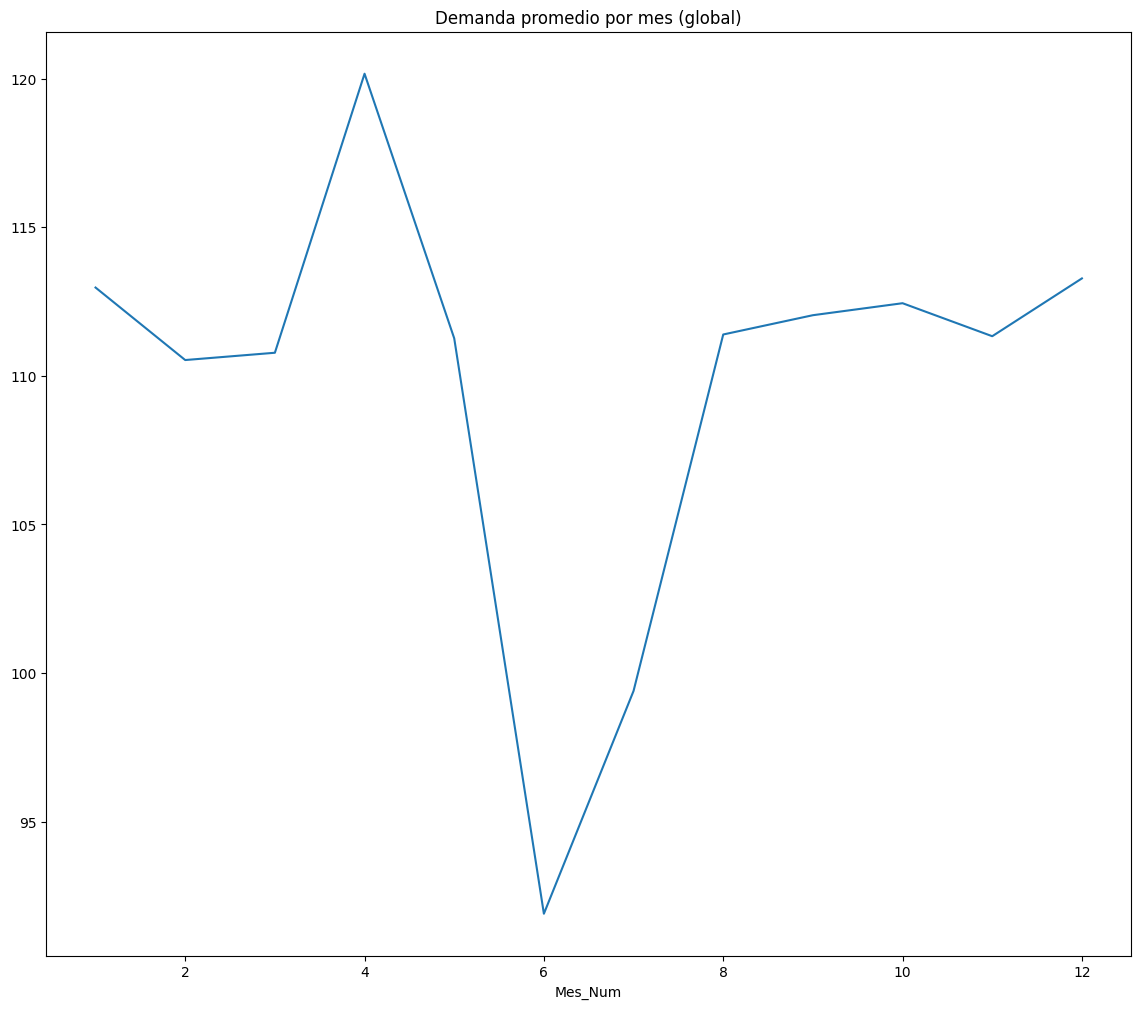

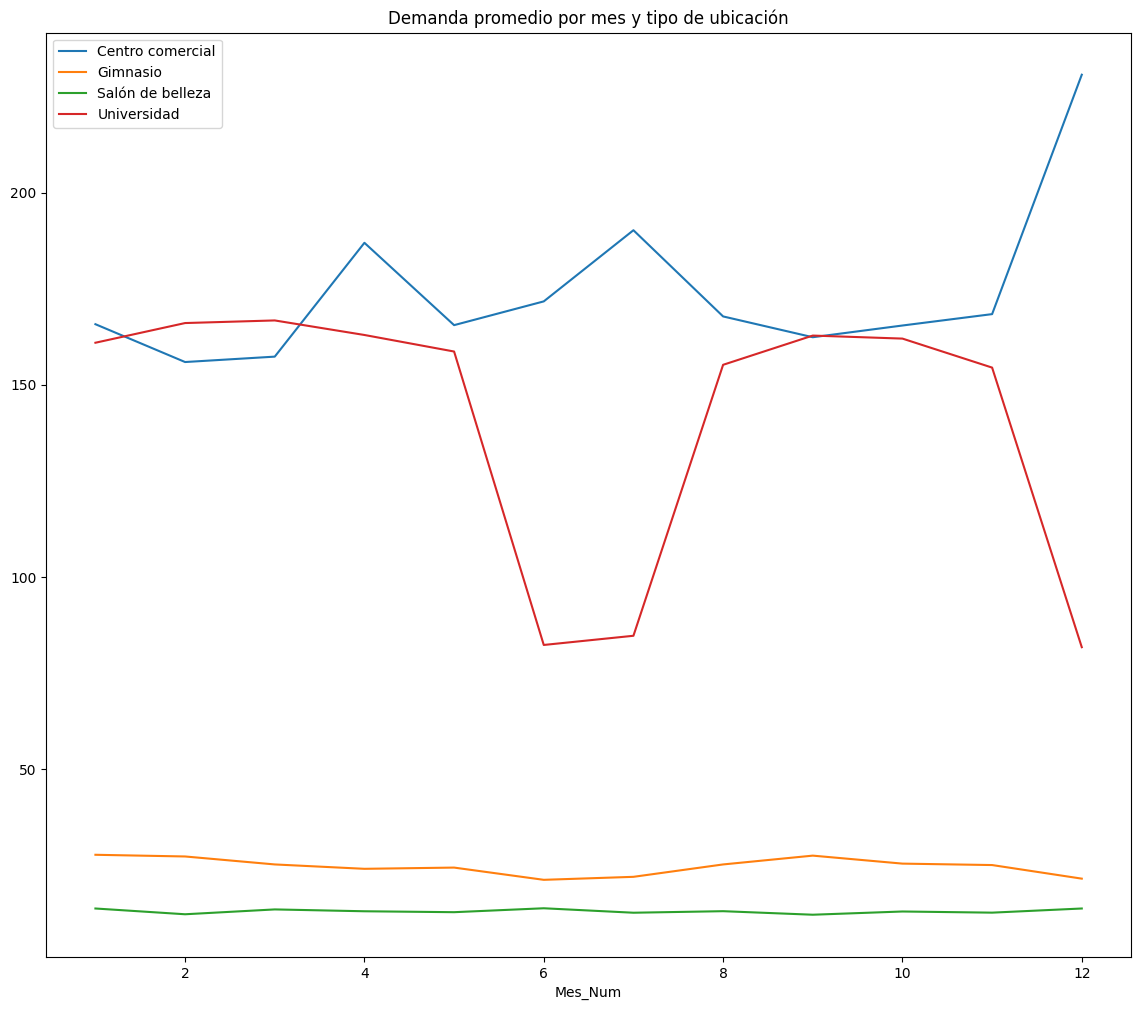

In [40]:
# Promedio mensual global y por tipo de ubicación
trend_mes = df.groupby('Mes_Num')['Demanda_Proyectada_Semana'].mean()
trend_mes_type = df.groupby(['Mes_Num','Ubicacion_Tipo'])['Demanda_Proyectada_Semana'].mean().unstack()

print("Demanda promedio por mes:\n", trend_mes)
print("\nDemanda promedio por mes y tipo:\n", trend_mes_type)

# (Opcional) gráfica
import matplotlib.pyplot as plt
trend_mes.plot(title="Demanda promedio por mes (global)"); plt.show()
trend_mes_type.plot(title="Demanda promedio por mes y tipo de ubicación"); plt.legend(); plt.show()


In [41]:
# Evita columnas constantes
num_for_corr = ['Trafico_ref_diario','Capacidad_Canal','Mes_Num','Demanda_Proyectada_Semana',
                'Producto_Code_num','Canal_Code_num','Ubicacion_Tipo_num',
                'Estacionalidad_Universidad','Estacionalidad_CC','Estacionalidad_Gym']
corr = df[num_for_corr].corr(method='pearson')
corr['Demanda_Proyectada_Semana'].sort_values(ascending=False)


,Demanda_Proyectada_Semana
Demanda_Proyectada_Semana,1.000000
Trafico_ref_diario,0.947213
Canal_Code_num,0.624997
Capacidad_Canal,0.624997
Estacionalidad_CC,0.275702
Estacionalidad_Universidad,0.244347
Producto_Code_num,0.051578
Mes_Num,-0.001188
Estacionalidad_Gym,-0.209140
Ubicacion_Tipo_num,-0.605119


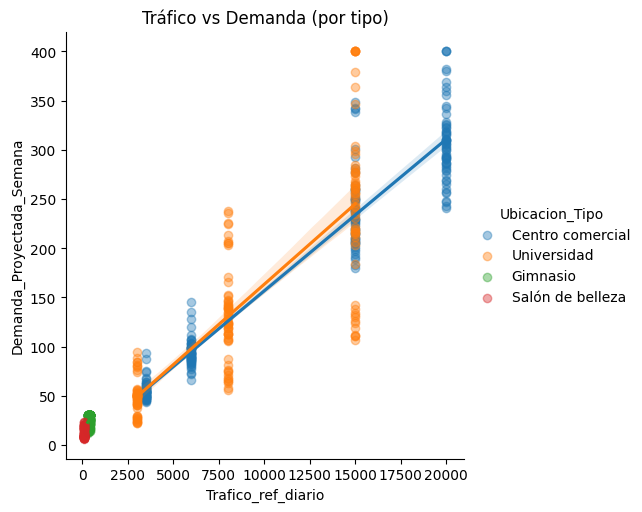

In [44]:
import seaborn as sns, matplotlib.pyplot as plt
# Scatter con tendencia
sns.lmplot(x='Trafico_ref_diario', y='Demanda_Proyectada_Semana',
           hue='Ubicacion_Tipo', data=df, scatter_kws={'alpha':0.4})
plt.title("Tráfico vs Demanda (por tipo)"); plt.show()


In [43]:
# Binear demanda en quintiles (solo para diagnóstico)
df['Demanda_bin'] = pd.qcut(df['Demanda_Proyectada_Semana'], q=5, labels=[1,2,3,4,5])
df['Demanda_bin'].value_counts().sort_index()


,count
Demanda_bin,
1,132
2,133
3,131
4,132
5,132


# Conclusiones

El análisis exploratorio de datos evidenció que la base construida no presenta valores faltantes, lo cual asegura consistencia para los modelos posteriores. Cabe destacar que el conjunto de datos fue simulado, ya que Globulive es un emprendimiento en etapa de lanzamiento y aún no se cuenta con registros reales de ventas. La simulación se realizó tomando como referencia el MOQ de la maquila (7,000 unidades por producto), las estimaciones promedio de estudiantes en universidades, y cifras aproximadas de visitantes en centros comerciales y gimnasios, con el fin de generar escenarios plausibles de comercialización.

Las estadísticas descriptivas indican que la demanda proyectada semanal tiene una media cercana a 110 unidades, con una amplia dispersión (desviación estándar de 106), lo que refleja variabilidad significativa entre ubicaciones y periodos. En cuanto a la forma, la demanda y el tráfico presentan asimetría positiva, lo que sugiere la presencia de más observaciones en niveles bajos de venta acompañadas de algunos escenarios de alta demanda; además, la curtosis negativa confirma colas ligeras, sin valores extremos. El análisis de outliers corroboró esta ausencia de valores atípicos relevantes.

En las variables categóricas, se constató una distribución balanceada de los cinco productos (20% cada uno), con mayor presencia de vending machines (420 registros) respecto a counter displays (240). Los centros comerciales concentran la mayor proporción de observaciones, seguidos de universidades y gimnasios. La cardinalidad de variables como “mes” y “ubicación” garantiza suficiente diversidad para capturar patrones estacionales y espaciales.

Respecto a las correlaciones, el tráfico de consumidores se confirma como el principal determinante de la demanda (r ≈ 0.95), seguido por la capacidad del canal (r ≈ 0.62). Las variables de estacionalidad aportan correlaciones más moderadas pero coherentes, reflejando picos en centros comerciales durante diciembre y en universidades en los semestres activos. El análisis bivariado evidenció que las vending machines tienden a generar mayor rotación de producto que los counter displays, y que tanto centros comerciales como universidades concentran los escenarios de mayor proyección.

En conjunto, el EDA valida la solidez del dataset simulado, resalta la pertinencia de variables como tráfico y canal de exhibición para explicar la demanda, y confirma que los modelos predictivos supervisados contarán con un insumo adecuado para anticipar patrones de consumo en el lanzamiento de Globulive.